In [ ]:
#!wget https://github.com/midas-network/COVID-19/archive/master.zip
#!unzip master.zip

In [13]:
import pandas as pd
import numpy as np
import os

from shapely.geometry import Point, Polygon
import descartes

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
root_path = 'COVID-19-master/data/cases/china/daily_cases_chinacdc_EN/'

recent = sorted(os.listdir(root_path))[-3]
path = os.path.join(root_path, recent)
df = pd.read_csv(path)
columns = ['Province', 'Suspeitos', 'Suspeitos Acumulados', 'Confirmados', 'Confirmados Acumulados', 'Mortes', 'Mortes Acumuladas']
df.columns= columns
print(df.shape)
display(df.head())
df.sum()

(34, 7)


Province  Suspeitos  Suspeitos Acumulados  \
0                           Beijing          4                    41   
1                           Tianjin         25                    71   
2                    Hebei Province          0                     0   
3                   Shanxi Province          0                     0   
4  Inner Mongolia Autonomous Region          4                     5   

   Confirmados  Confirmados Acumulados  Mortes  Mortes Acumuladas  
0            6                     565       0                  8  
1            2                     147       0                  3  
2            0                     319       0                  6  
3            1                     135       0                  0  
4           12                      89       0                  1

Province                  BeijingTianjinHebei ProvinceShanxi ProvinceInn...
Suspeitos                                                                58
Suspeitos Acumulados                                                    159
Confirmados                                                             114
Confirmados Acumulados                                                81960
Mortes                                                                    6
Mortes Acumuladas                                                      3293
dtype: object

In [27]:
dados = {'Data': [], 'Confirmados': [], 'CA': [], 'Mortes': [], 'MA': []}

def processo():
    df.columns = columns
    data = csv[:-4].split('-')
    dados['Data'].append(data[2][:2]+'/'+data[1]+'/'+data[0])
    dados['Confirmados'].append(df['Confirmados'].sum()) 
    dados['CA'].append(df['Confirmados Acumulados'].sum()) 
    dados['Mortes'].append(df['Mortes'].sum()) 
    dados['MA'].append(df['Mortes Acumuladas'].sum())

for k, csv in enumerate(sorted(os.listdir(root_path))[:-3]):
  
  path = os.path.join(root_path, csv)
  print(csv)
  df = pd.read_csv(path)
  
  print(df.columns[0])

  if(df.columns[0] == 'province'):
    df = df.loc[:, ['province', 'Add Suspect', 'Cumulative Suspect', 'New diagnosis', 'Cumulative diagnosis', 'Added death', 'Cumulative death' ]]
    processo()
  elif(df.columns[0] == 'Province'):
    df = df.loc[:, ['Province', 'Add Suspect', 'Cumulative Suspect', 'New diagnosis', 'Cumulative diagnosis', 'Added death', 'Cumulative death' ]]
    processo()
  
  # df = df.loc[:, df.columns] 

   

2020-01-10_en.csv
Province
2020-01-11_en.csv
Province
2020-01-12_en.csv
Province
2020-01-13_en.csv
Province
2020-01-14_en.csv
Province
2020-01-16_en.csv
Province
2020-01-17_en.csv
Province
2020-01-18_en.csv
Province
2020-01-19_en.csv
Province
2020-01-20_en.csv
Province
2020-01-21_en.csv
Province
2020-01-22_en.csv
Province
2020-01-23_en.csv
Province
2020-01-24_en.csv
Province
2020-01-25_en.csv
Province
2020-01-26_en.csv
Province
2020-01-27_en.csv
Province
2020-01-28_en.csv
Province
2020-01-29_en.csv
Province
2020-01-30_en.csv
Province
2020-01-31_en.csv
Province
2020-02-01_en.csv
Province
2020-02-02_en.csv
Province
2020-02-03_en.csv
Province
2020-02-04_en.csv
Province
2020-02-05_en.csv
Province
2020-02-06_en.csv
Province
2020-02-07_en.csv
Province
2020-02-08_en.csv
Province
2020-02-09_en.csv
Province
2020-02-10_en.csv
Province
2020-02-11_en.csv
province
2020-02-12_en.csv
province
2020-02-13_en.csv
province
2020-02-14_en.csv
province
2020-02-15_en.csv
OBJECTID
2020-02-16_en.csv
province
2

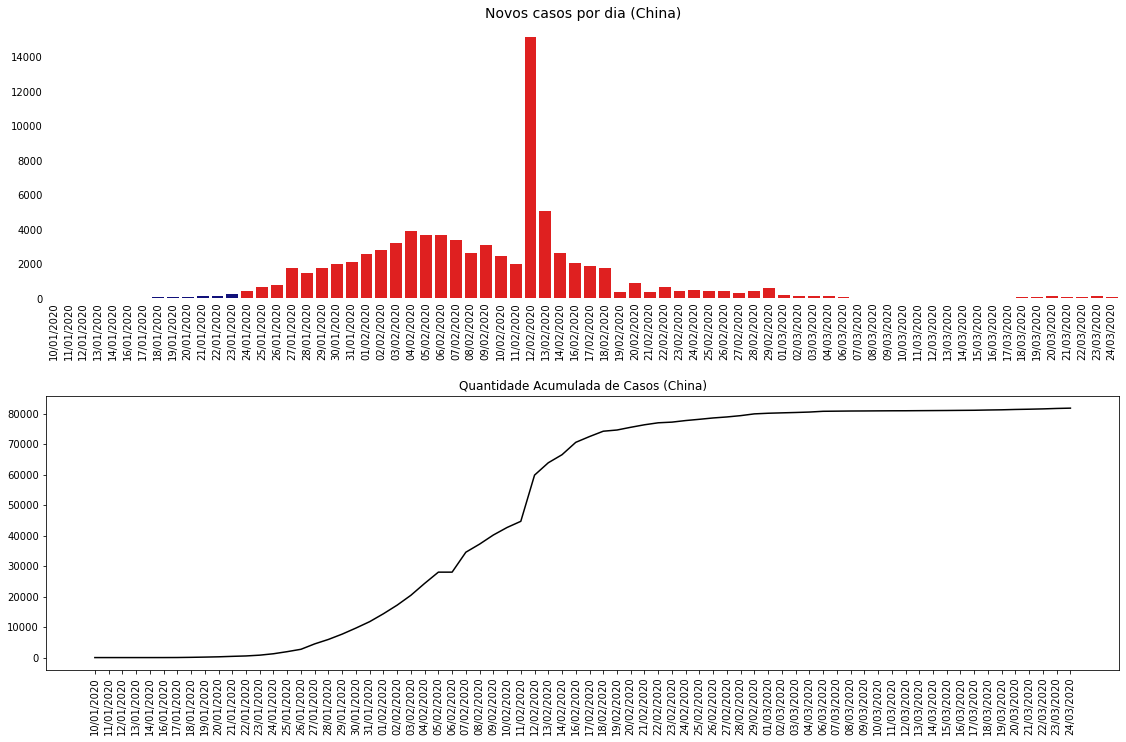

In [28]:
fig, ax = plt.subplots(2,1,figsize=(16, 10))
sns.lineplot(np.arange(len(dados['Data'])), dados['CA'], ax=ax[1], color='k', linestyle='dashed')
ax[1].set_title('Quantidade Acumulada de Casos (China)')
ax[1].set_xticks(np.arange(len(dados['Data'])))
ax[1].set_xticklabels(dados['Data'])

clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
sns.barplot(np.arange(len(dados['Data'])), dados['Confirmados'], palette=clrs, ax=ax[0], label=None)
ax[0].set_title('Novos casos por dia (China)', fontsize=14)
ax[0].set_xticks(np.arange(len(dados['Data'])))
ax[0].set_xticklabels(dados['Data'], rotation=90)
ax[0].set_frame_on(False)
ax[0].tick_params(axis='both', which='both', length=0)

fig.tight_layout(pad=2.0)
plt.xticks(rotation=90)
plt.savefig('china-pordia.svg', format='svg', dpi=300)
plt.show()

No handles with labels found to put in legend.


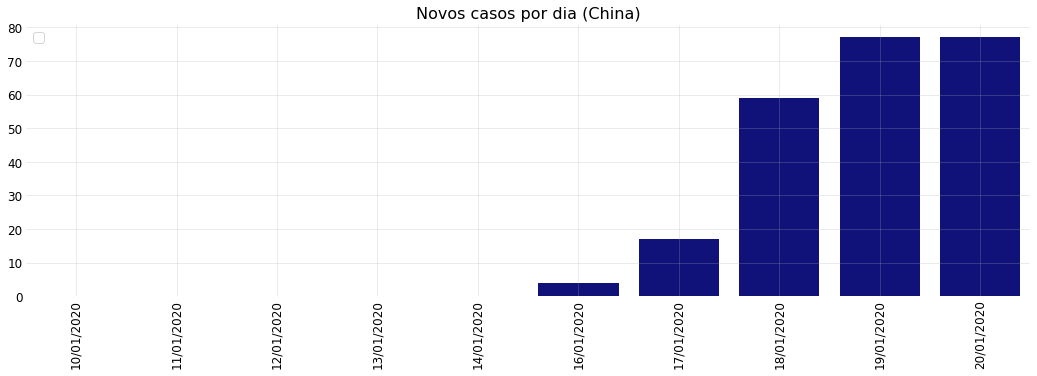

No handles with labels found to put in legend.


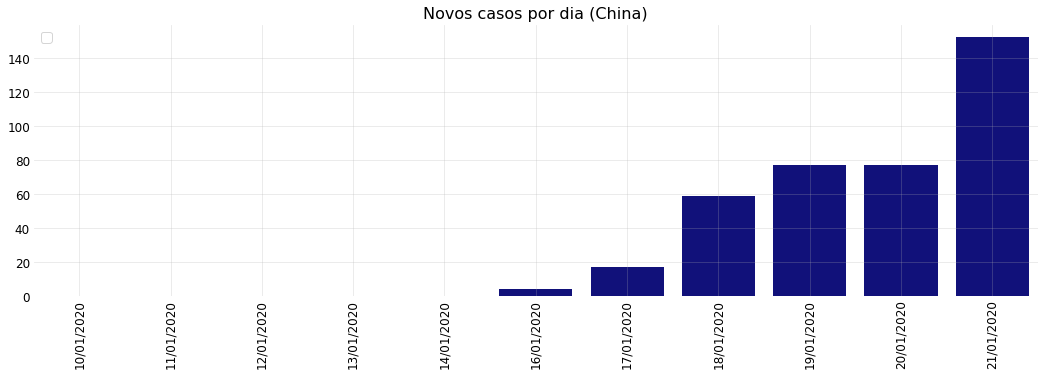

No handles with labels found to put in legend.


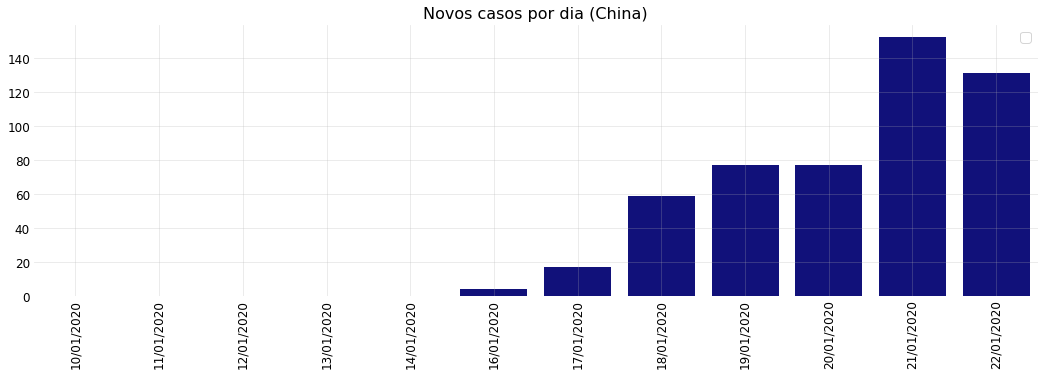

No handles with labels found to put in legend.


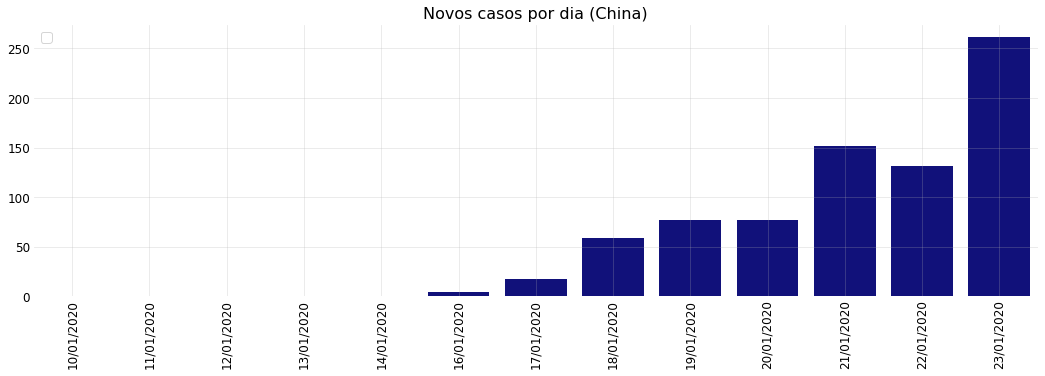

No handles with labels found to put in legend.


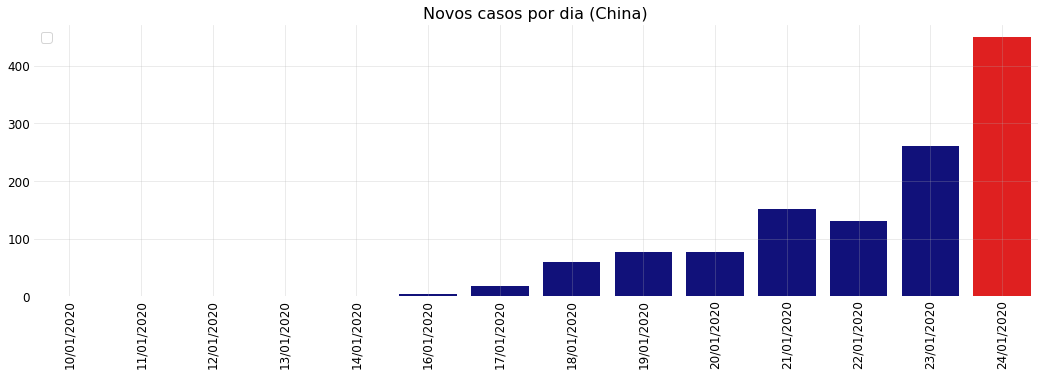

No handles with labels found to put in legend.


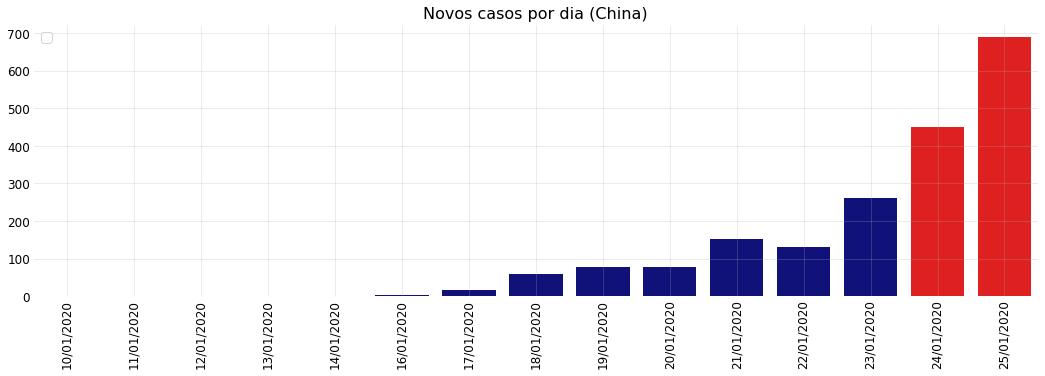

No handles with labels found to put in legend.


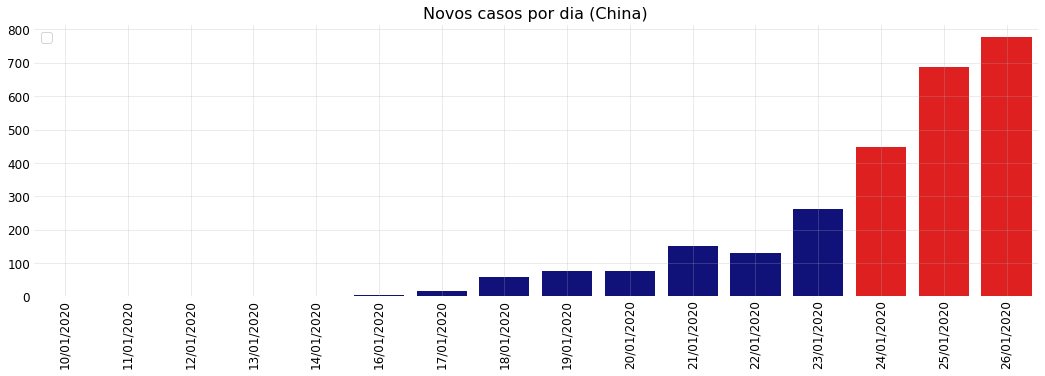

No handles with labels found to put in legend.


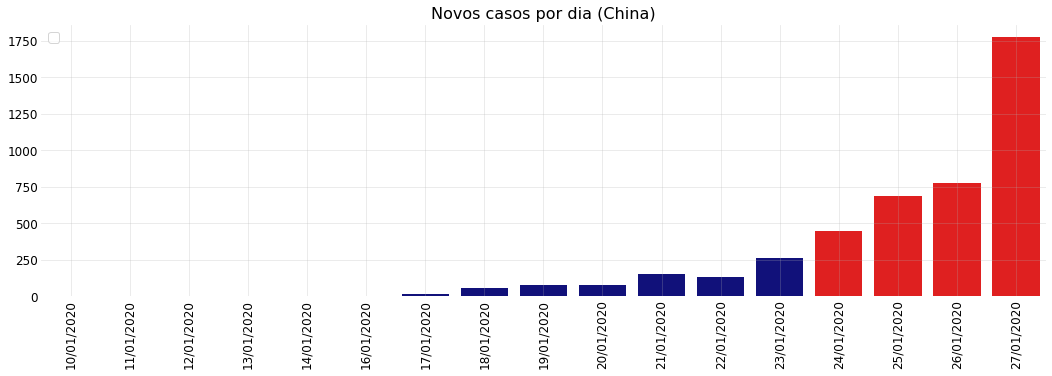

No handles with labels found to put in legend.


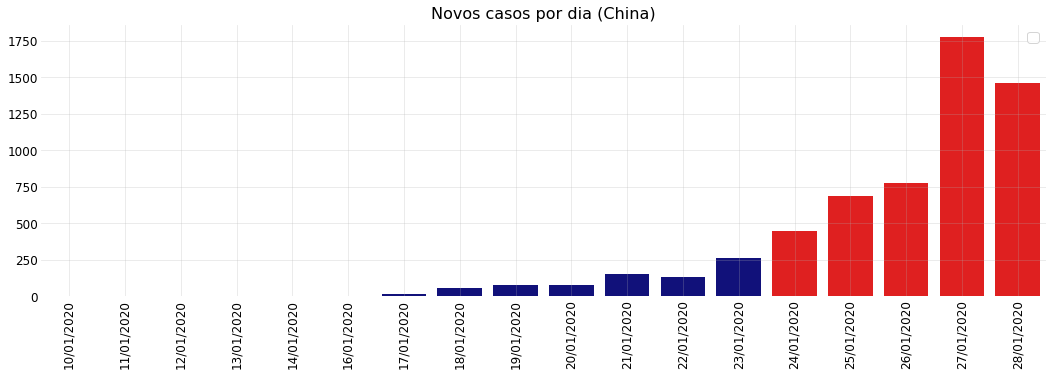

No handles with labels found to put in legend.


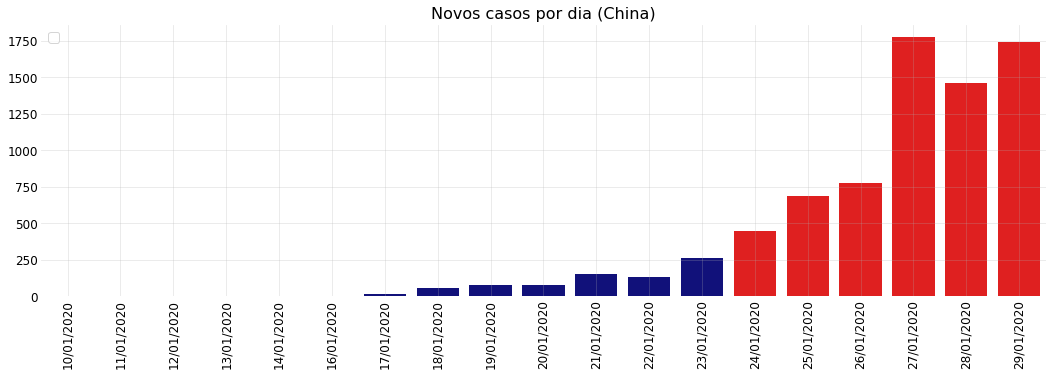

No handles with labels found to put in legend.


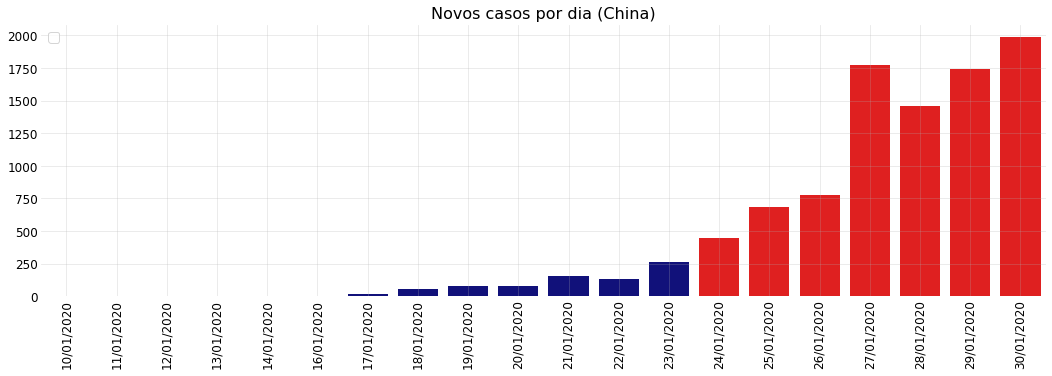

No handles with labels found to put in legend.


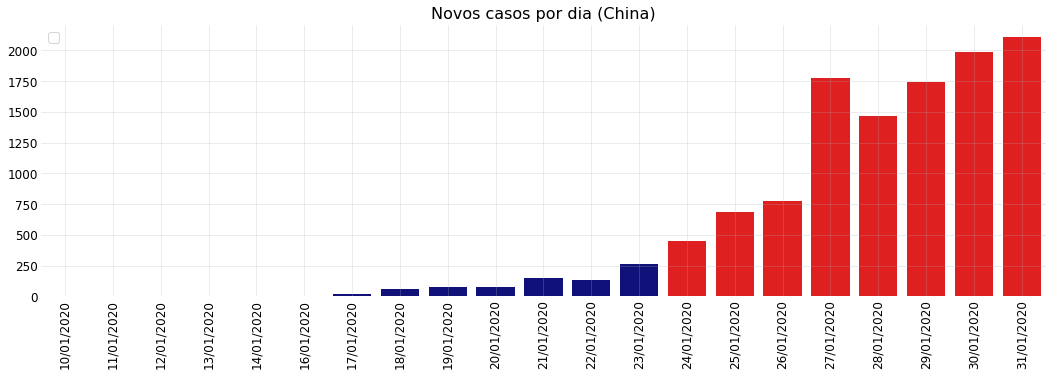

No handles with labels found to put in legend.


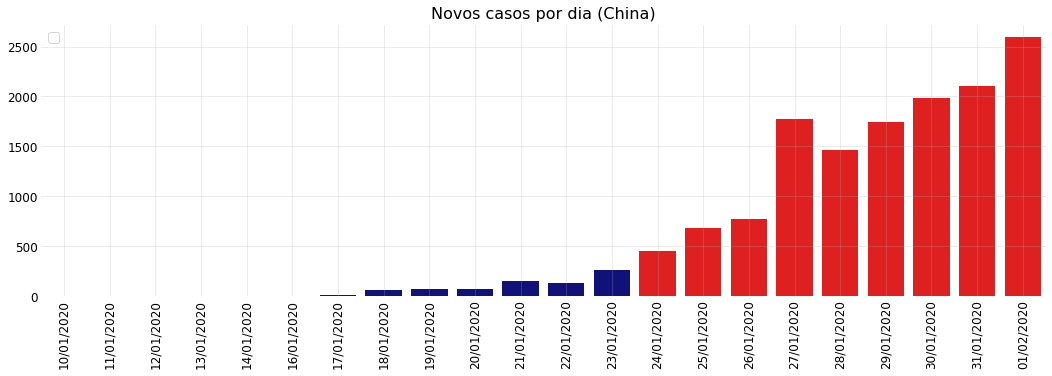

No handles with labels found to put in legend.


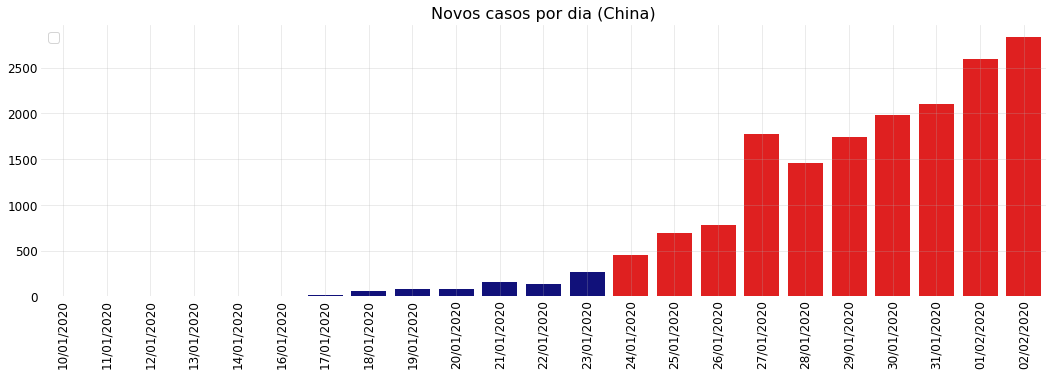

No handles with labels found to put in legend.


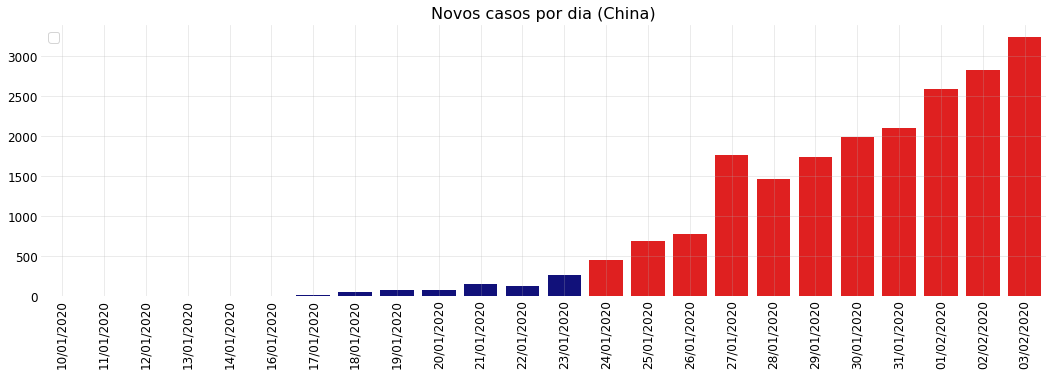

No handles with labels found to put in legend.


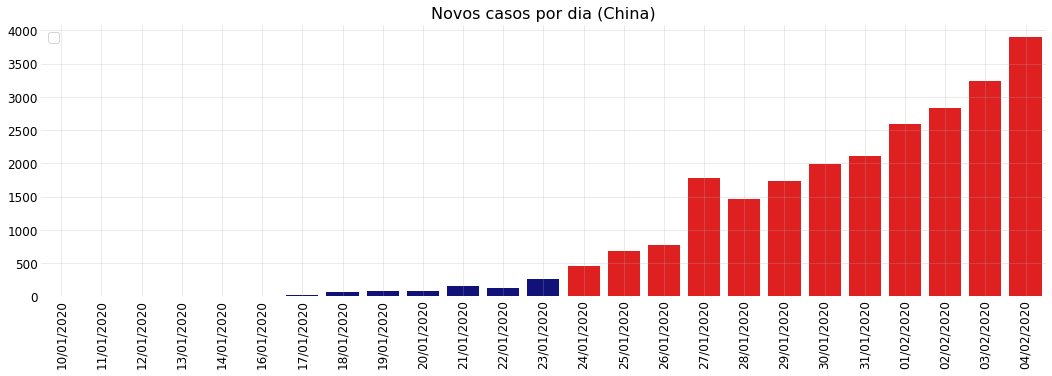

No handles with labels found to put in legend.


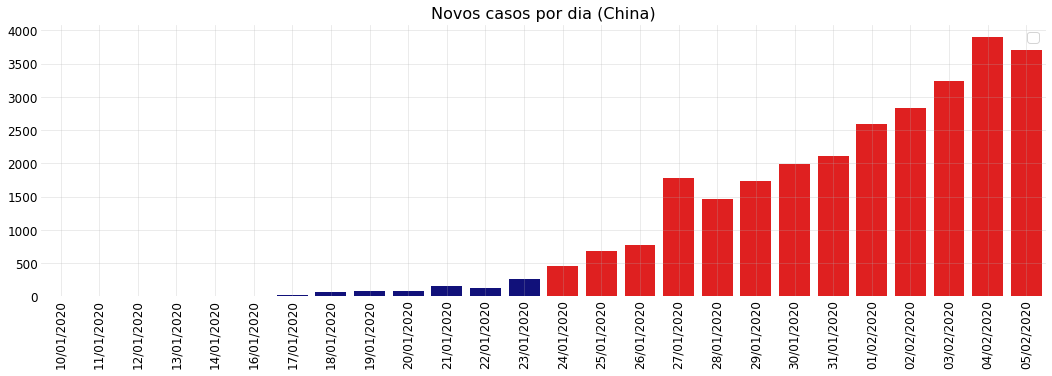

No handles with labels found to put in legend.


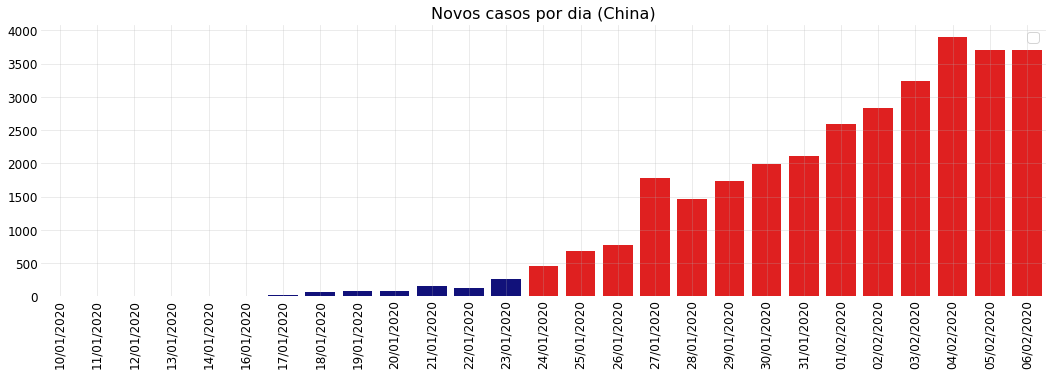

No handles with labels found to put in legend.


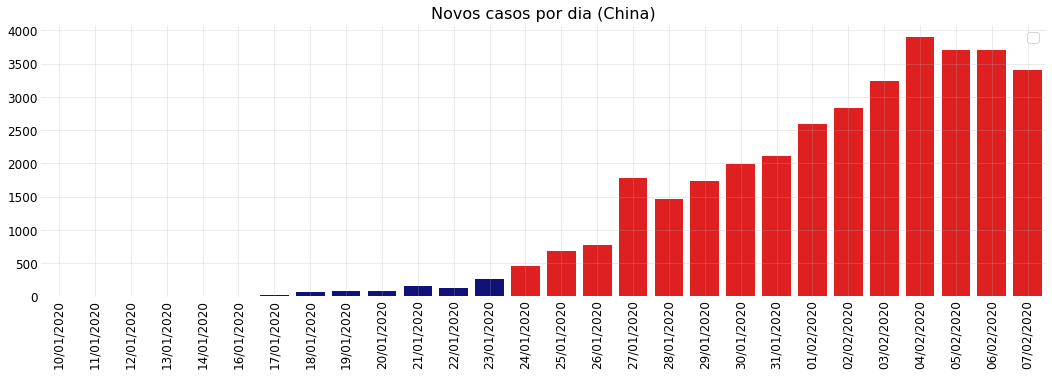

No handles with labels found to put in legend.


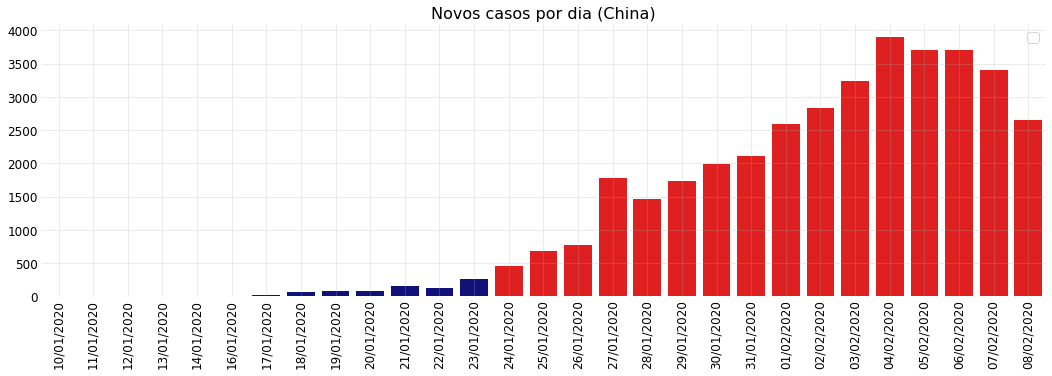

No handles with labels found to put in legend.


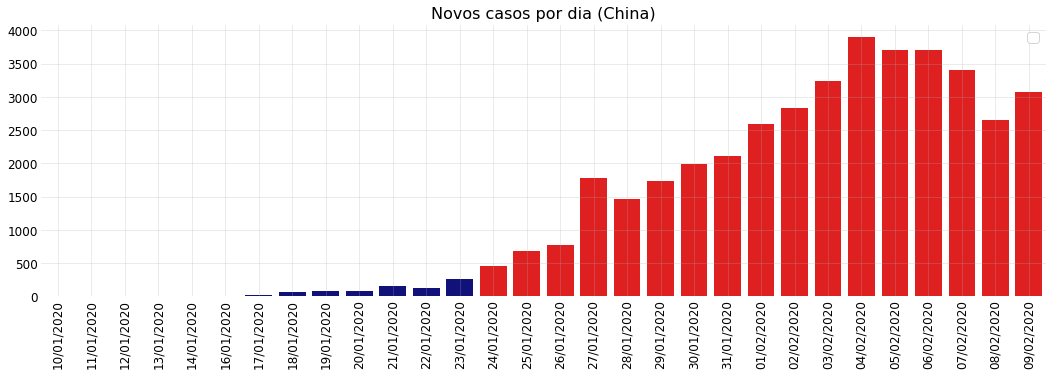

No handles with labels found to put in legend.


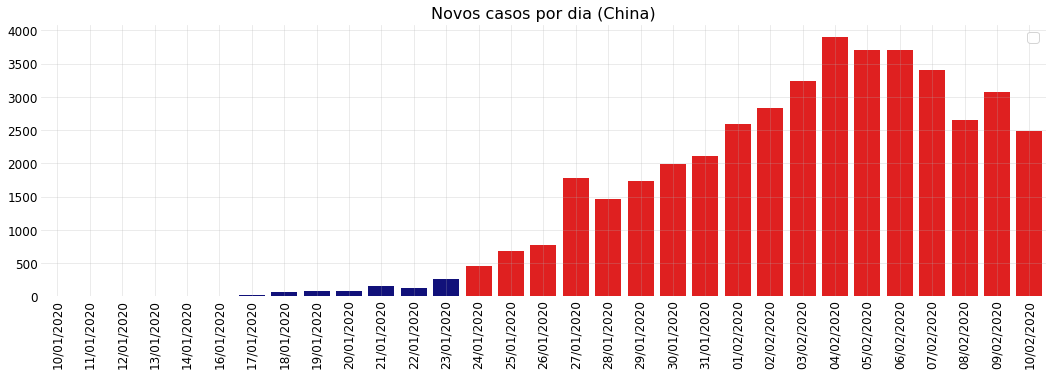

No handles with labels found to put in legend.


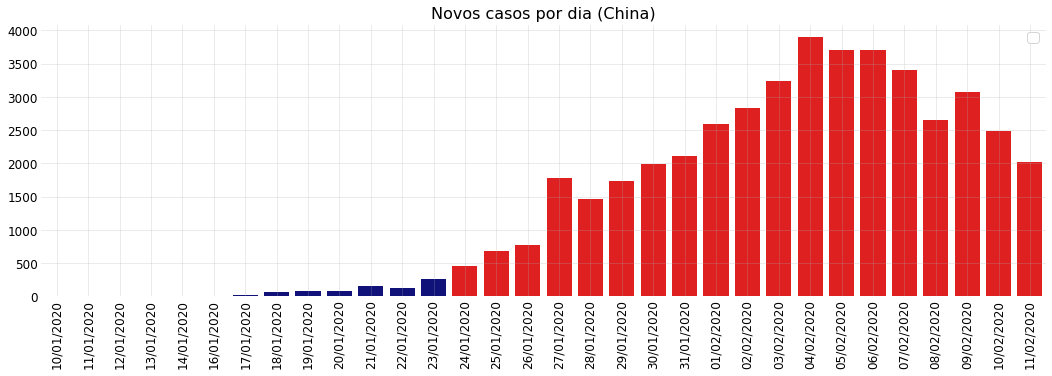

No handles with labels found to put in legend.


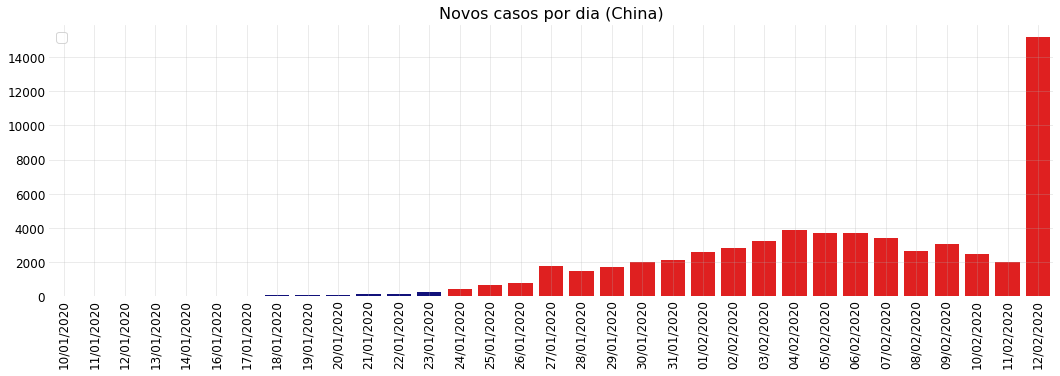

No handles with labels found to put in legend.


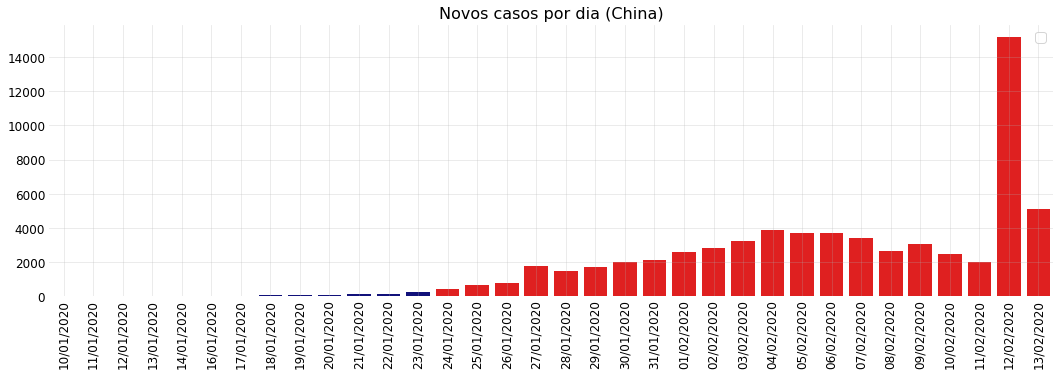

No handles with labels found to put in legend.


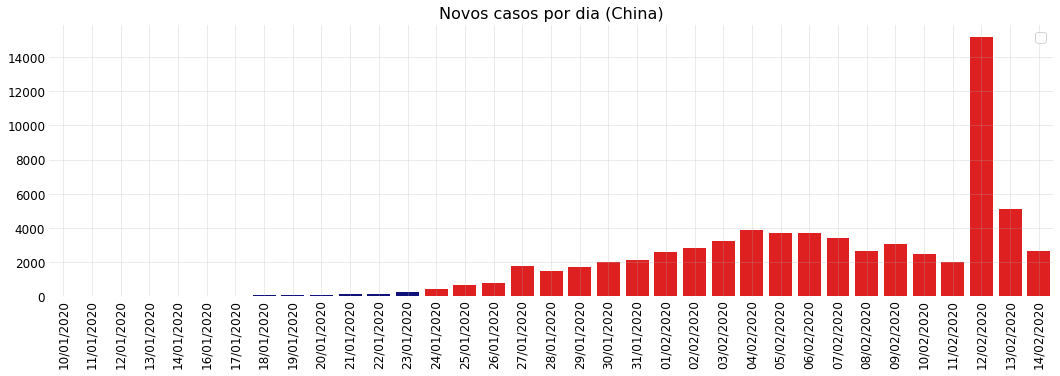

No handles with labels found to put in legend.


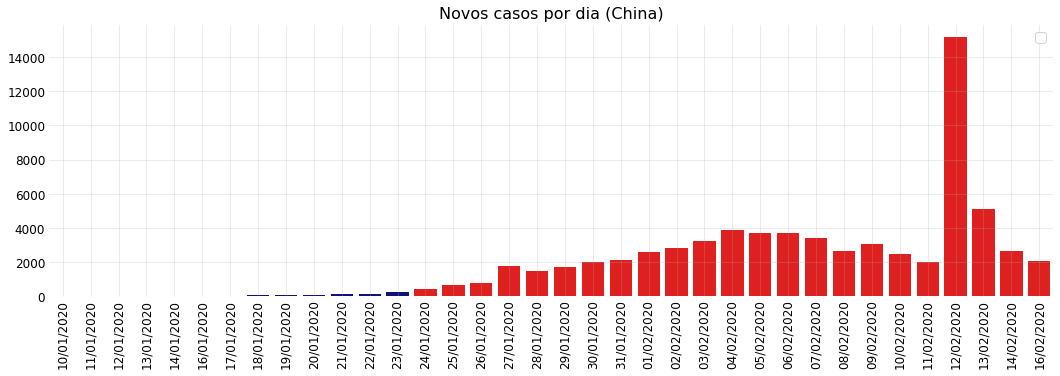

No handles with labels found to put in legend.


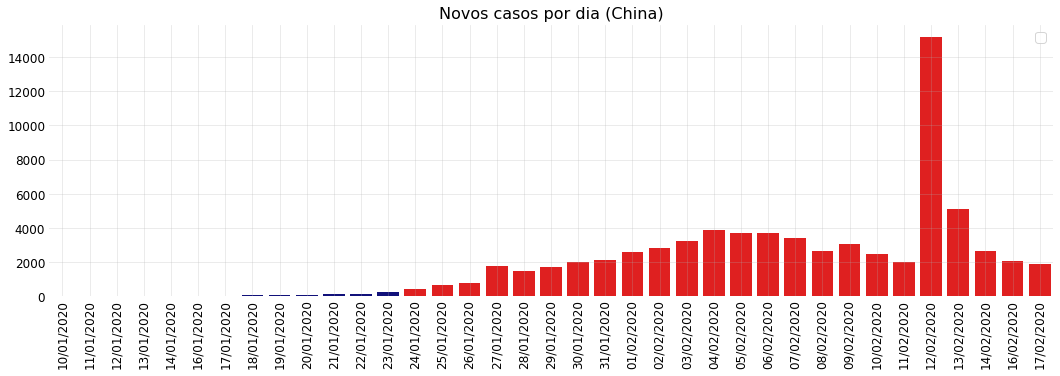

No handles with labels found to put in legend.


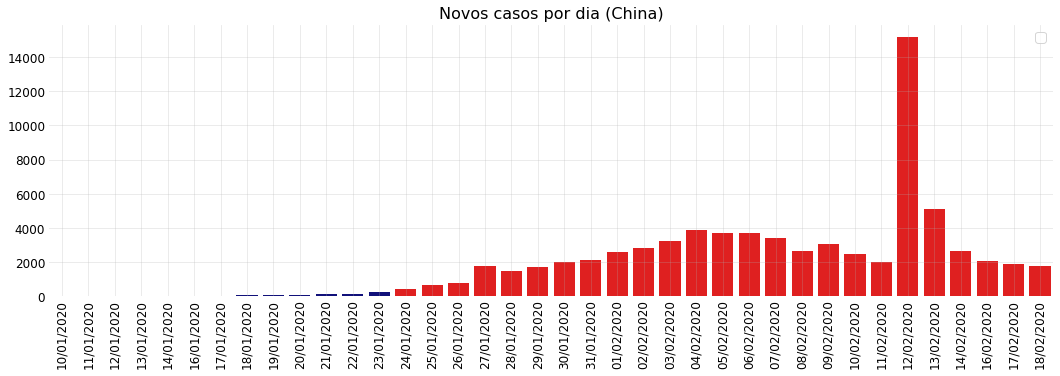

No handles with labels found to put in legend.


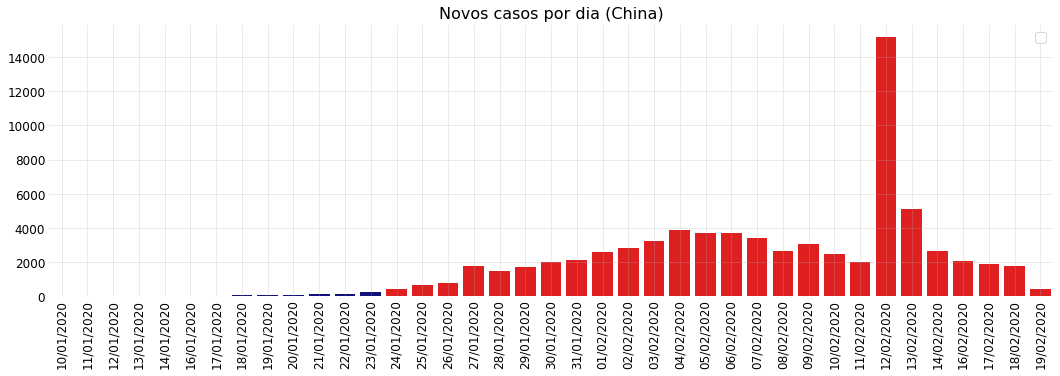

No handles with labels found to put in legend.


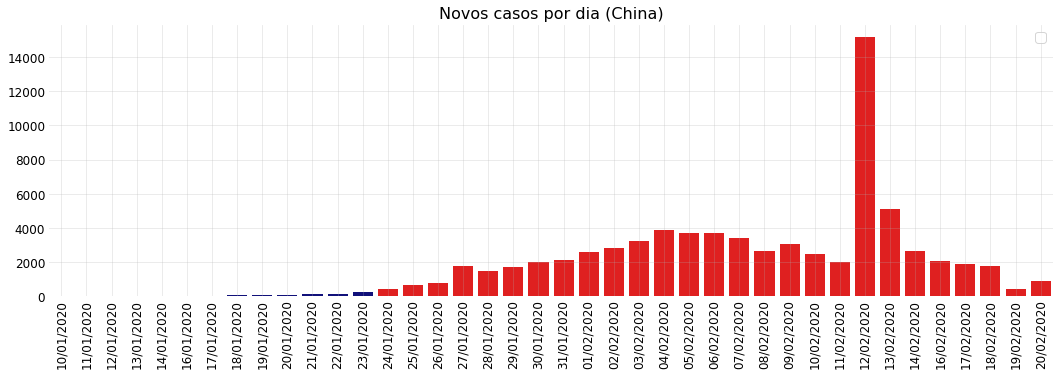

No handles with labels found to put in legend.


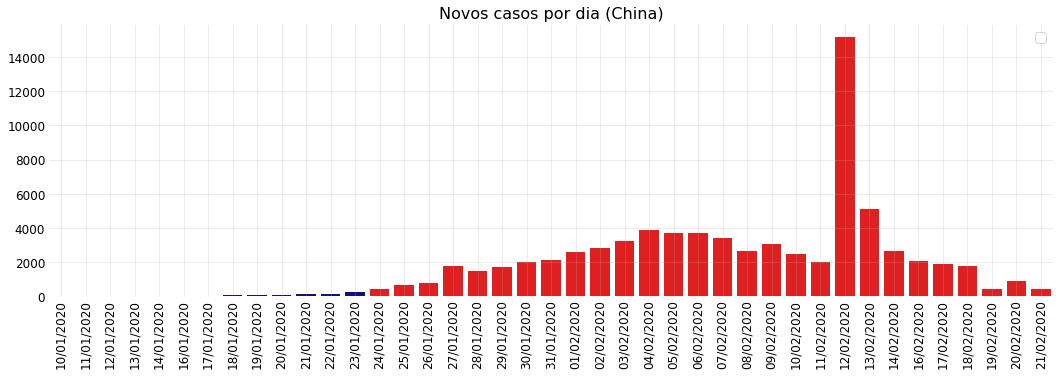

No handles with labels found to put in legend.


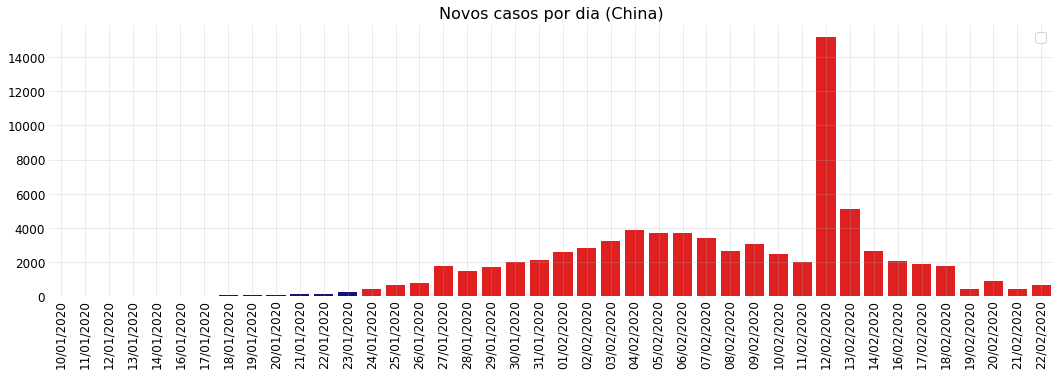

No handles with labels found to put in legend.


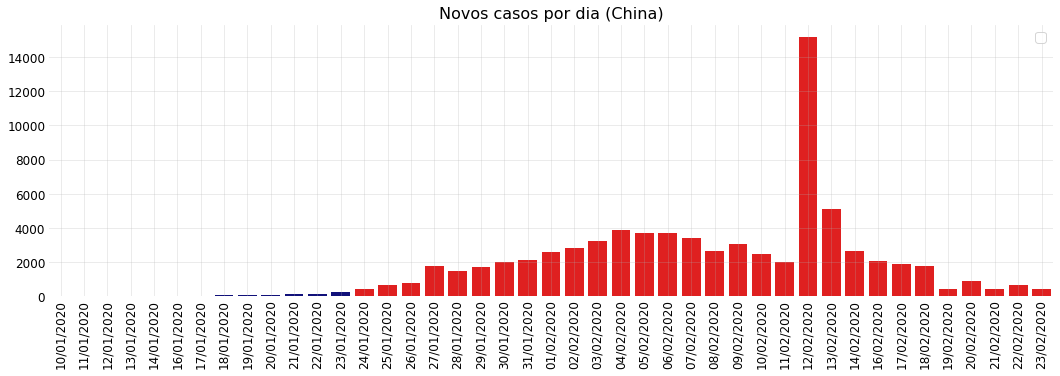

No handles with labels found to put in legend.


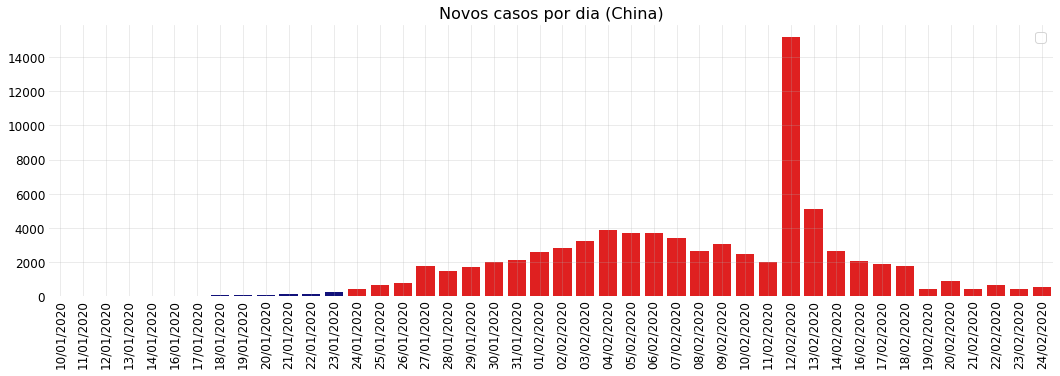

No handles with labels found to put in legend.


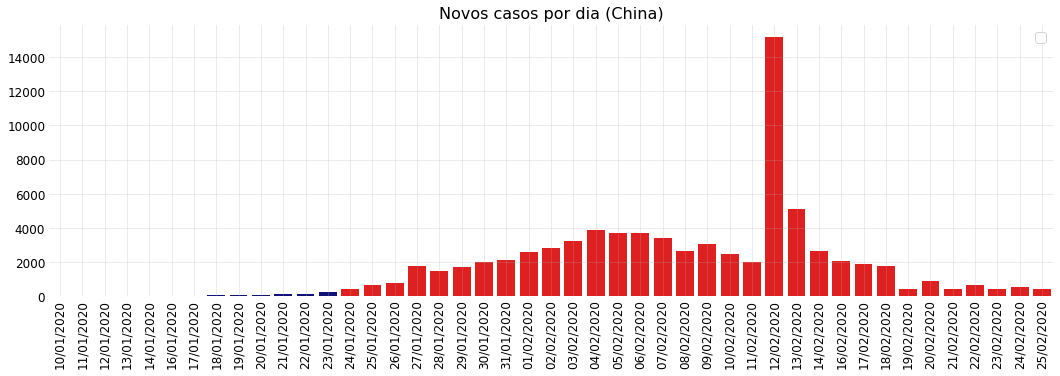

No handles with labels found to put in legend.


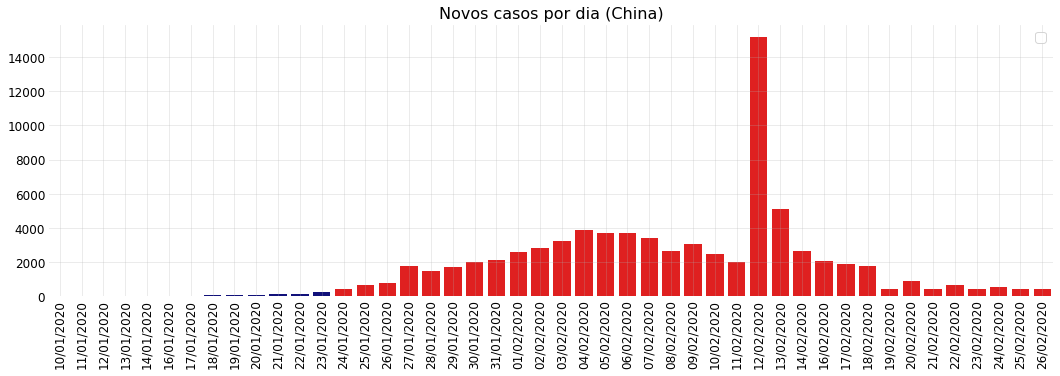

No handles with labels found to put in legend.


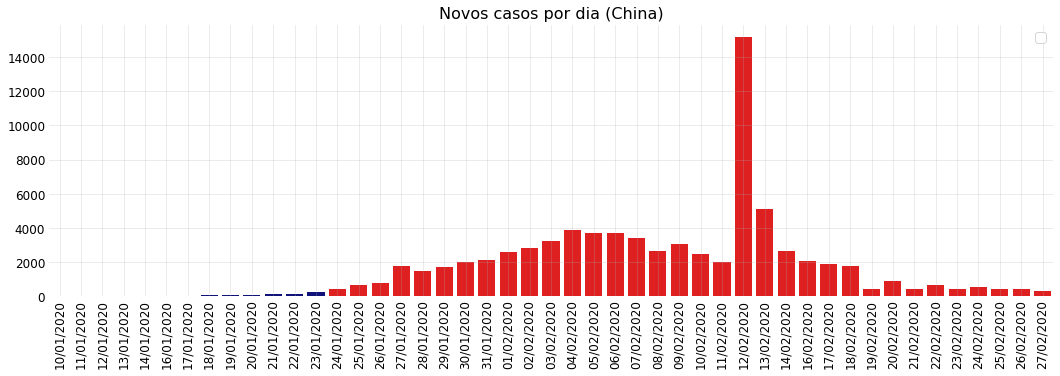

No handles with labels found to put in legend.


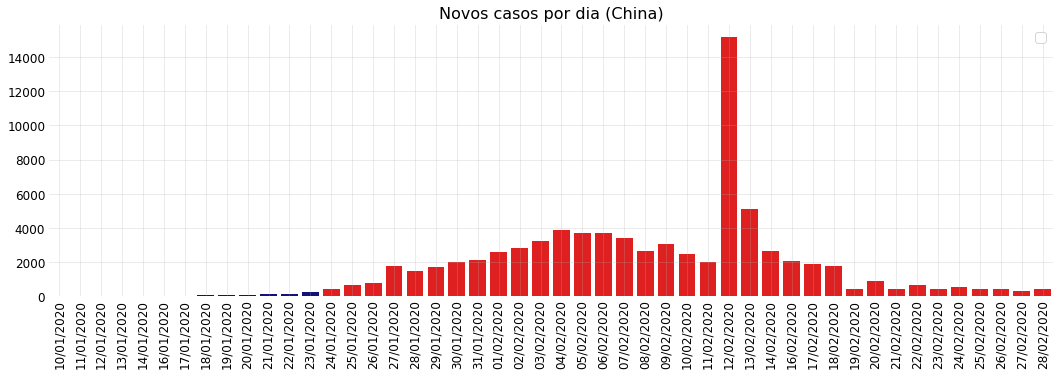

No handles with labels found to put in legend.


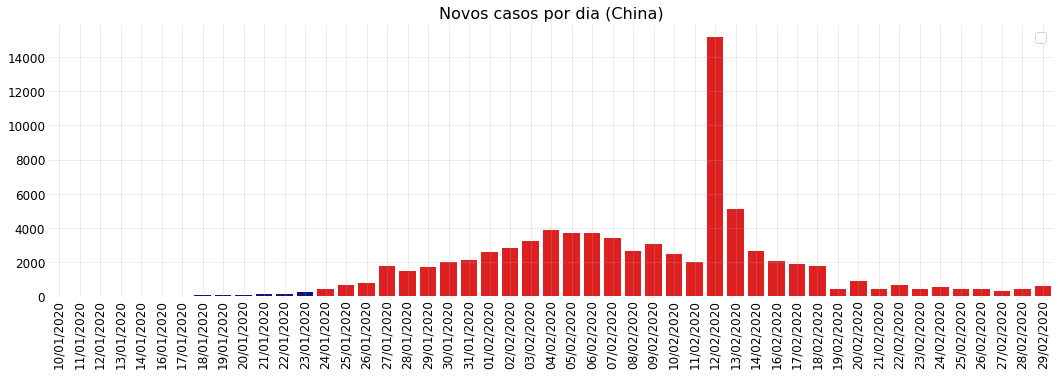

No handles with labels found to put in legend.


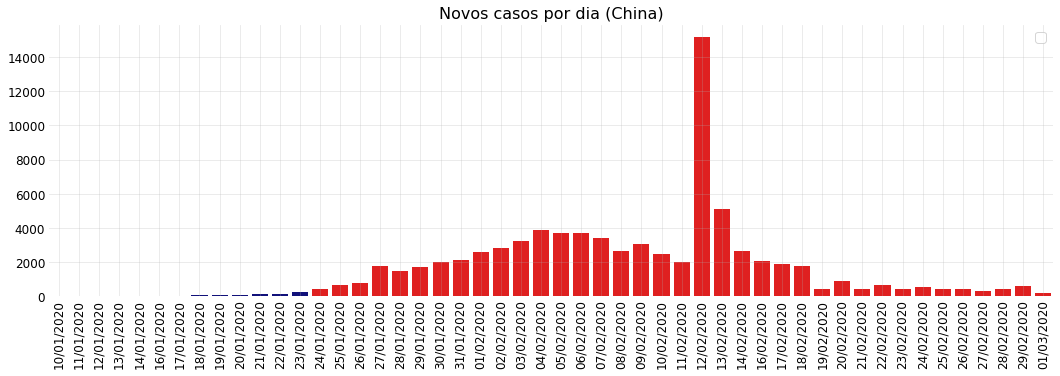

No handles with labels found to put in legend.


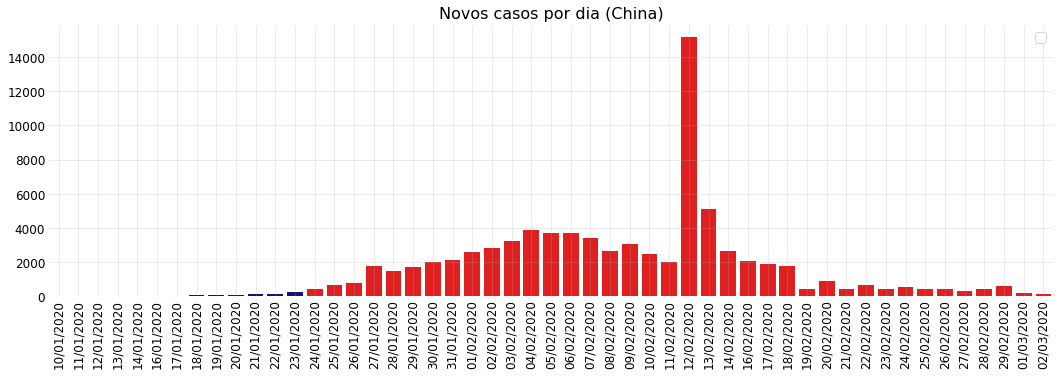

No handles with labels found to put in legend.


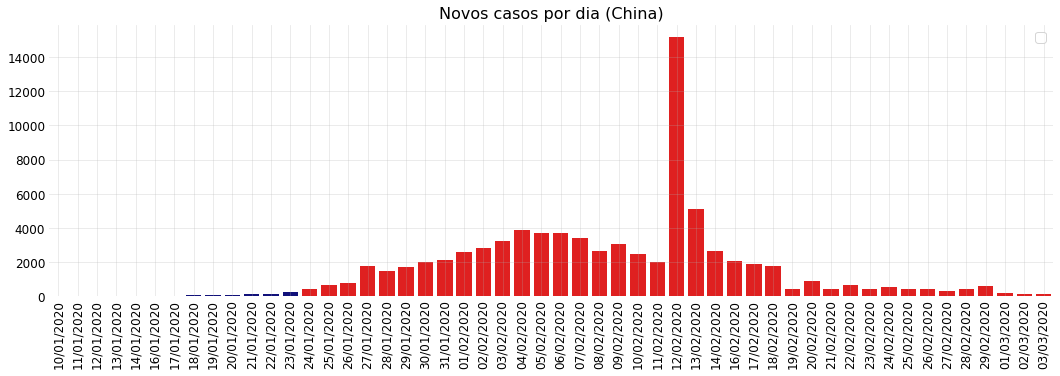

No handles with labels found to put in legend.


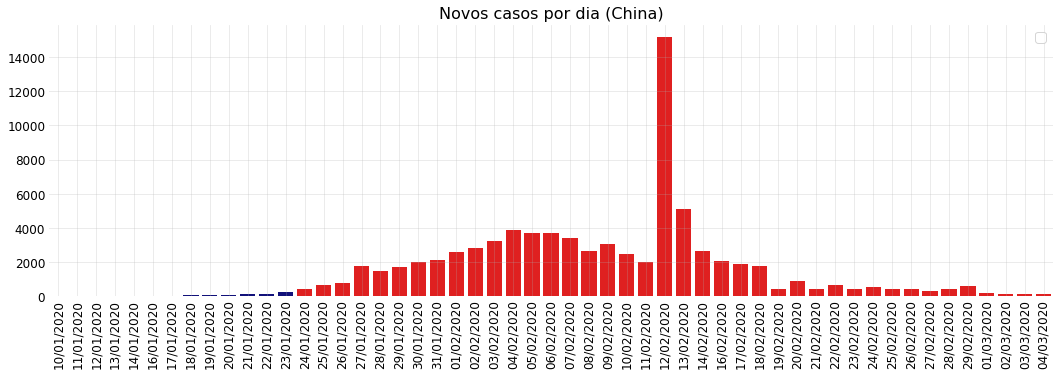

No handles with labels found to put in legend.


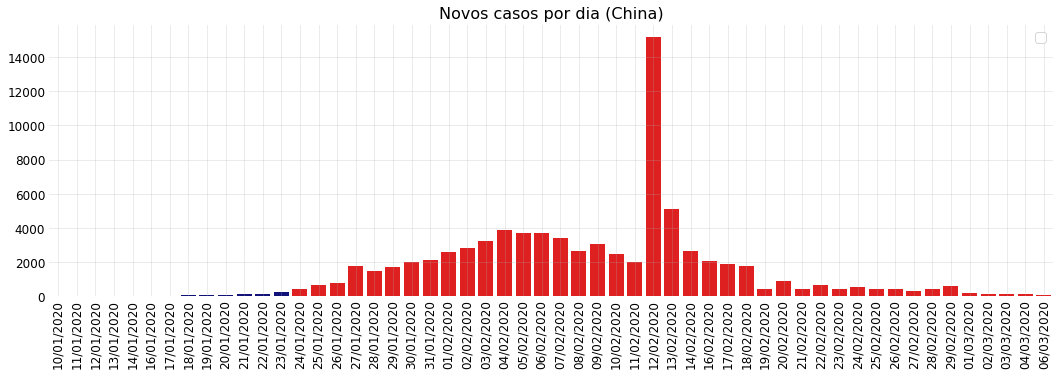

No handles with labels found to put in legend.


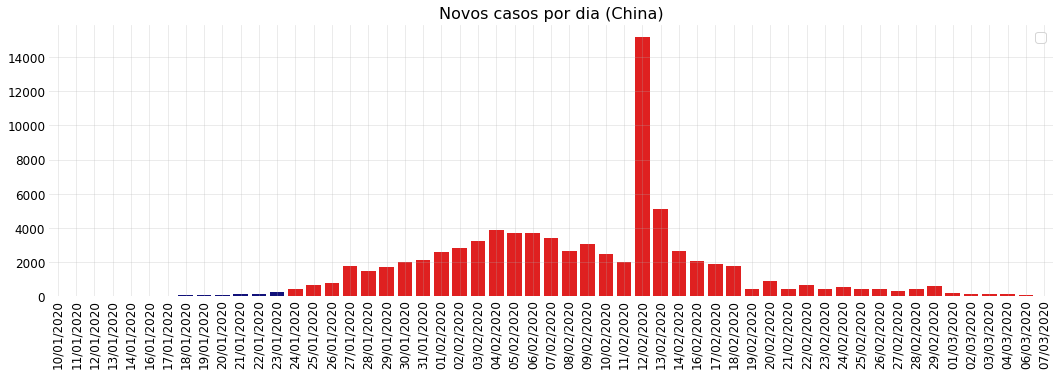

No handles with labels found to put in legend.


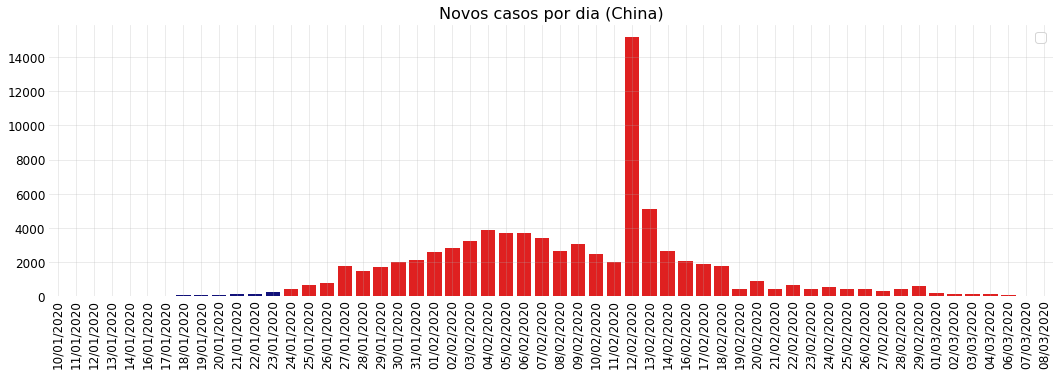

No handles with labels found to put in legend.


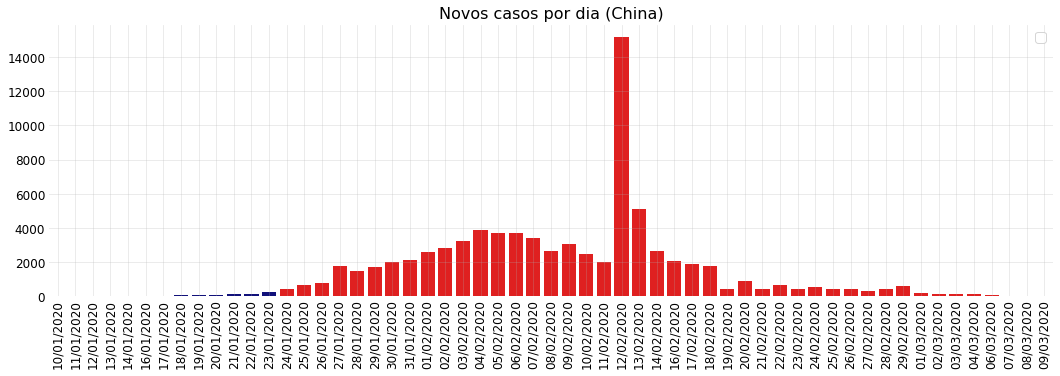

No handles with labels found to put in legend.


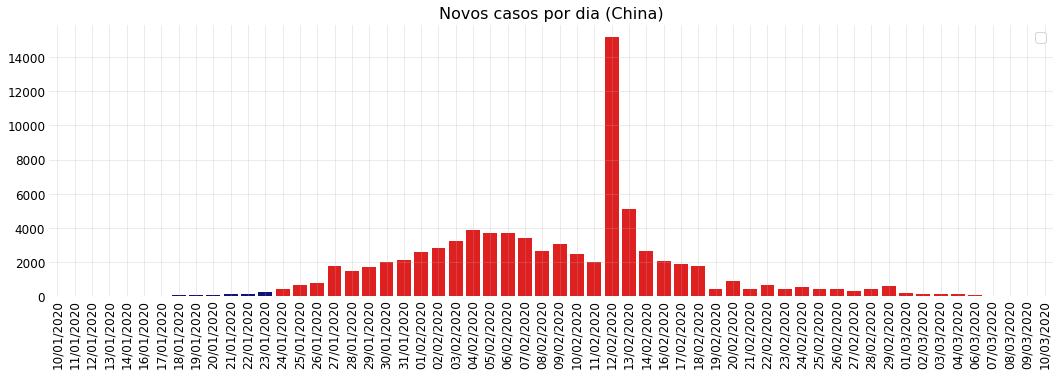

No handles with labels found to put in legend.


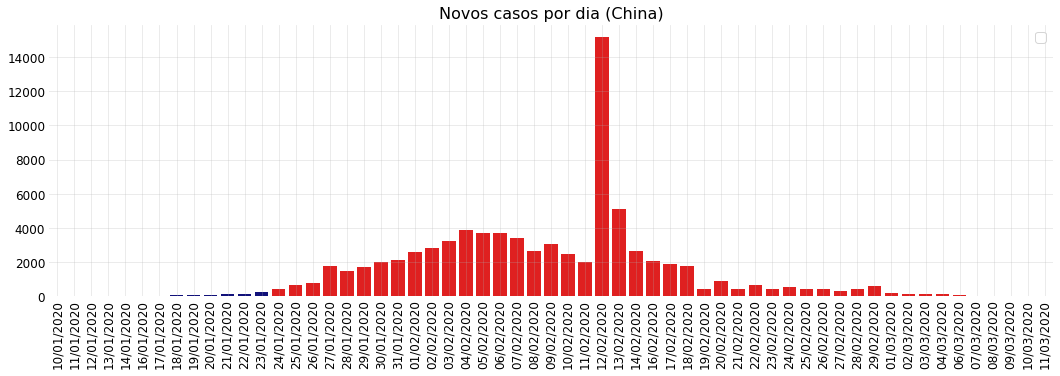

No handles with labels found to put in legend.


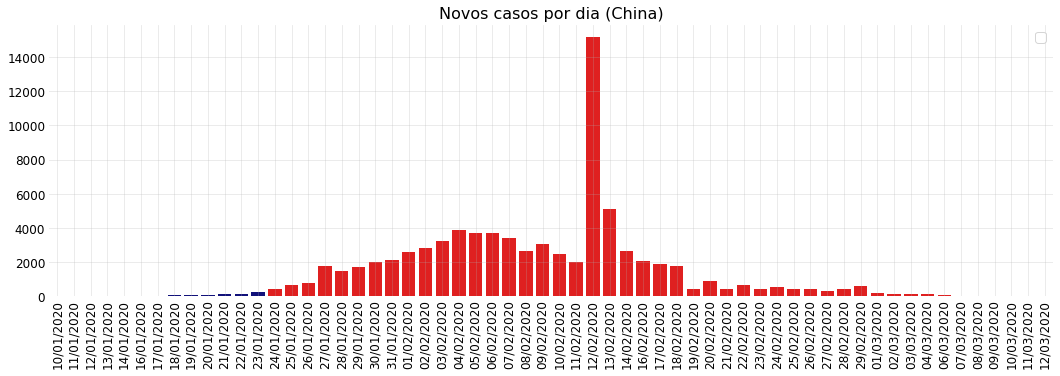

No handles with labels found to put in legend.


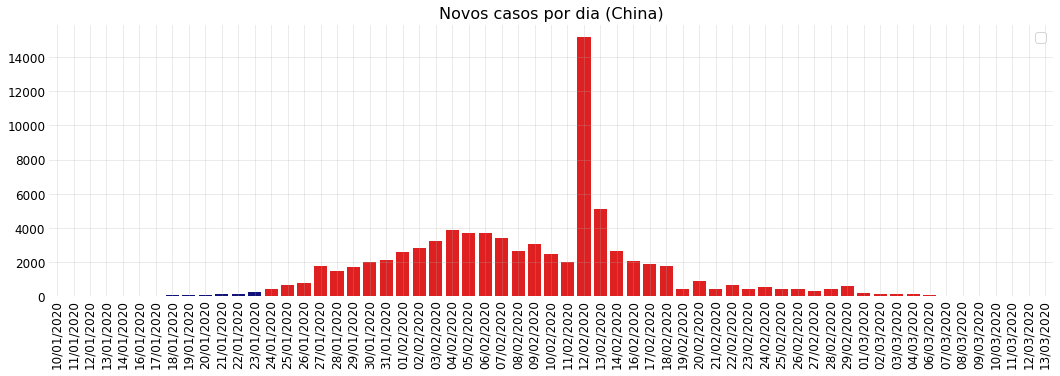

No handles with labels found to put in legend.


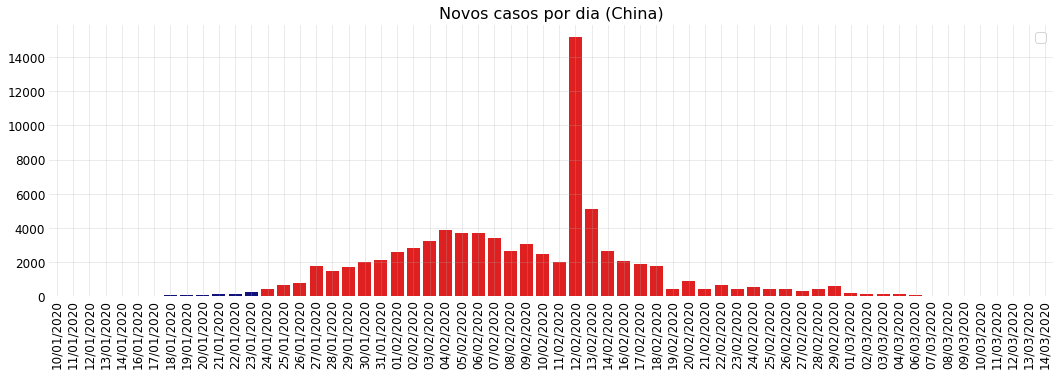

No handles with labels found to put in legend.


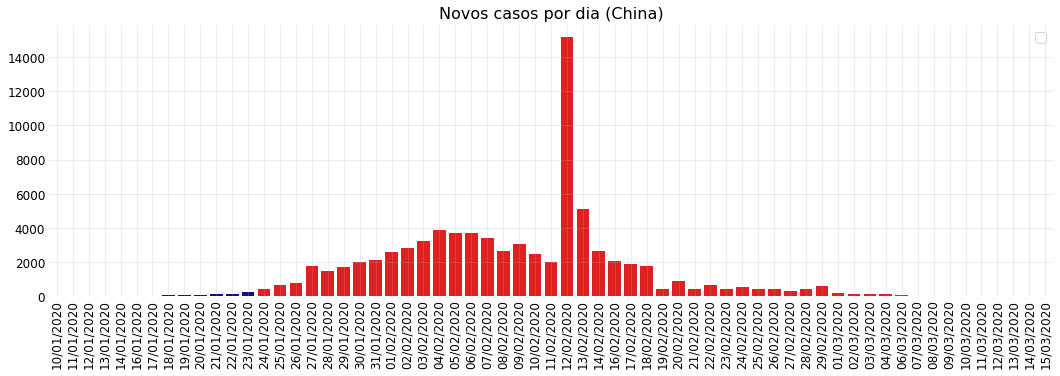

No handles with labels found to put in legend.


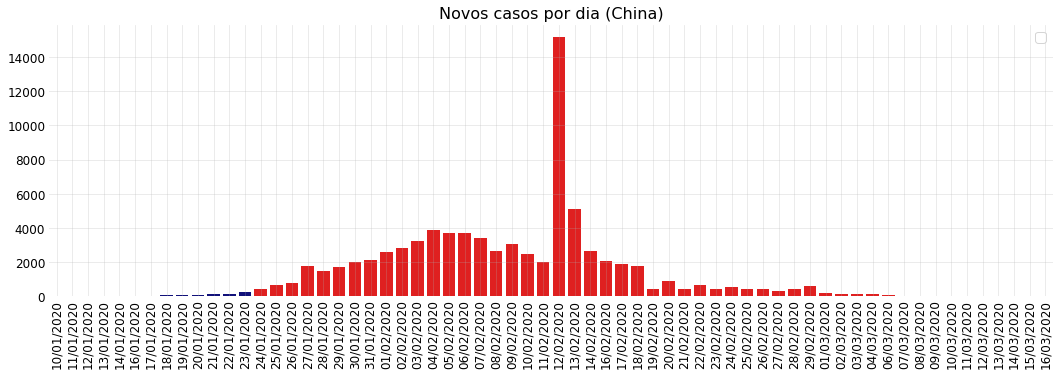

No handles with labels found to put in legend.


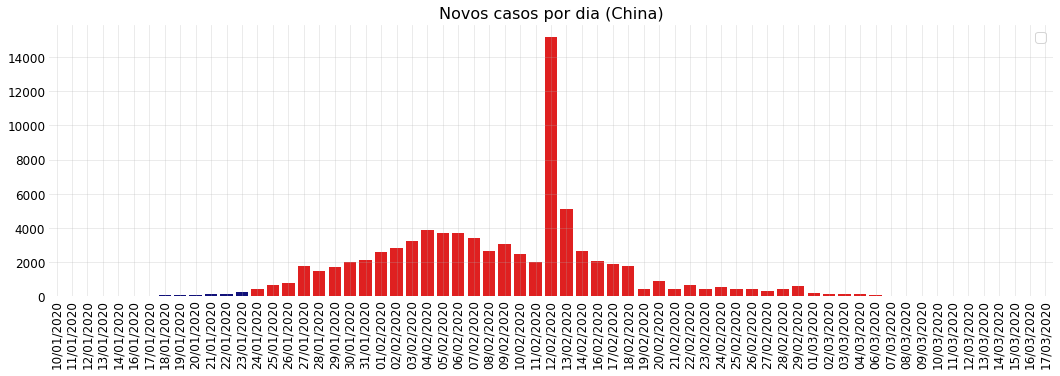

No handles with labels found to put in legend.


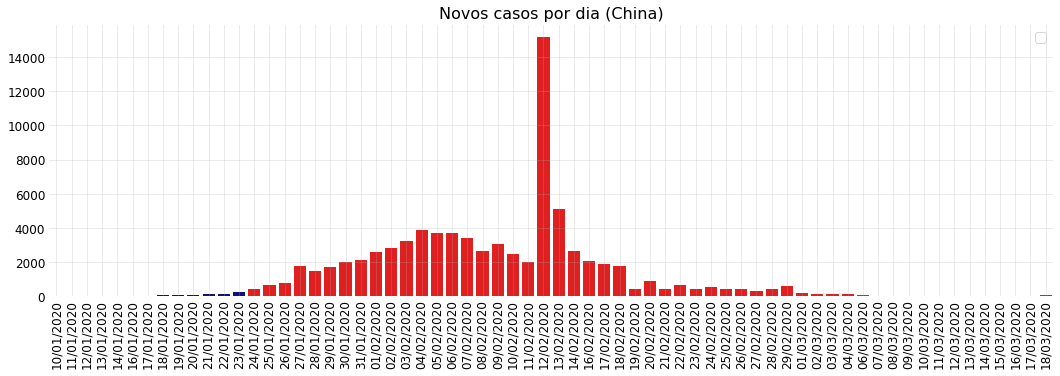

No handles with labels found to put in legend.


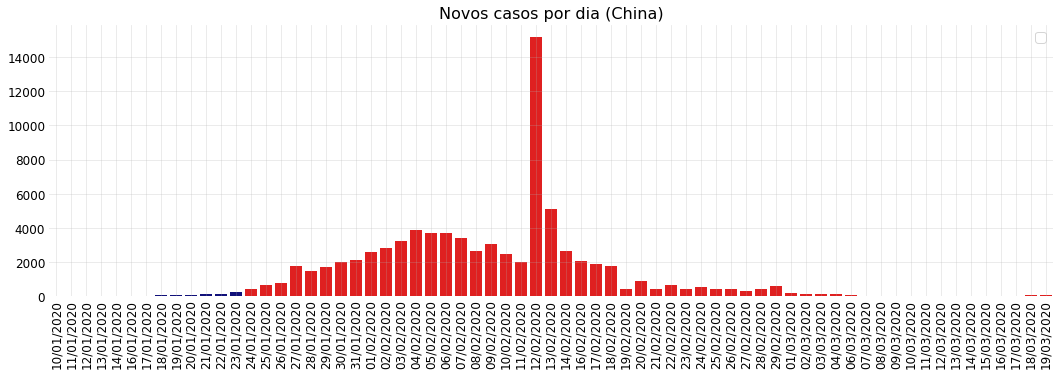

No handles with labels found to put in legend.


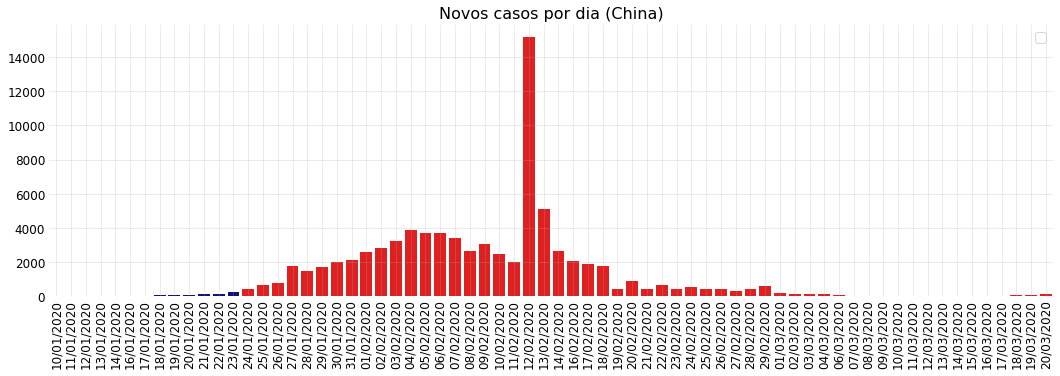

No handles with labels found to put in legend.


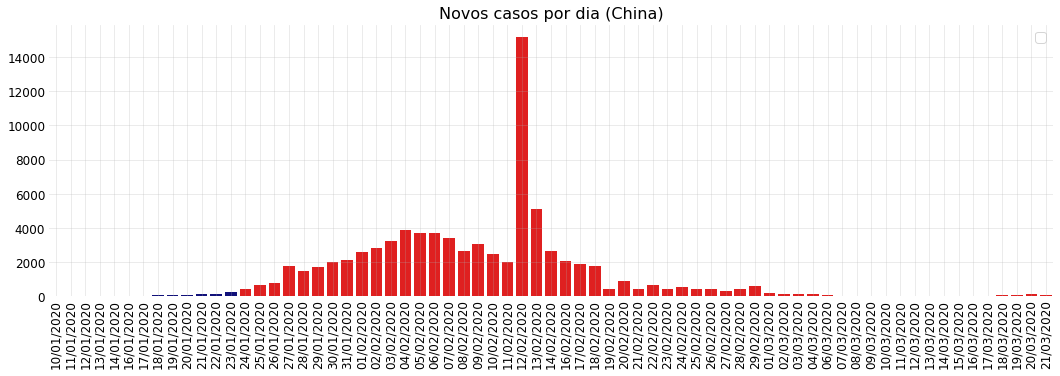

No handles with labels found to put in legend.


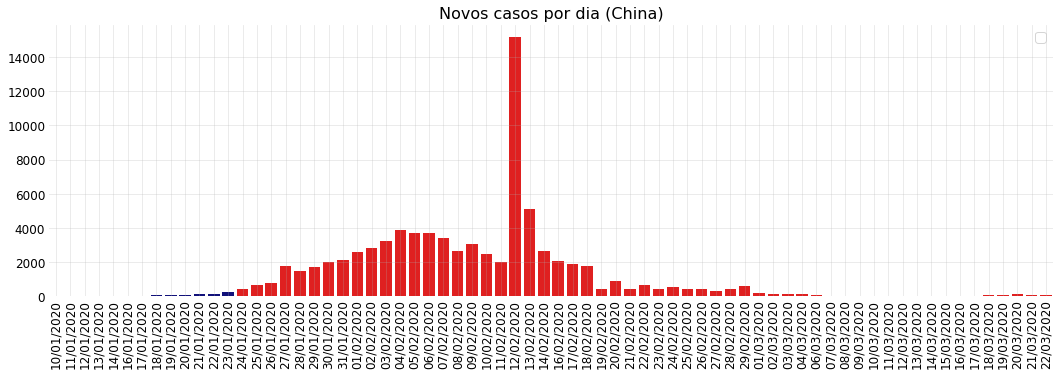

No handles with labels found to put in legend.


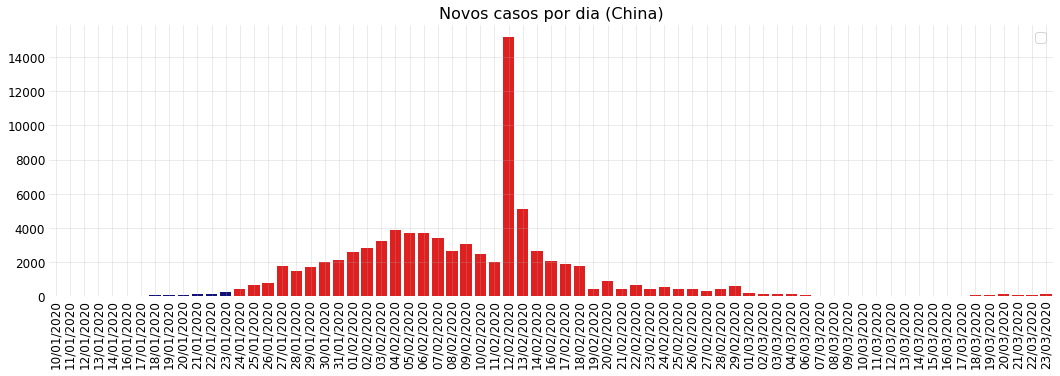

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.mkdir('imgs/')

for i in range(10,len(dados['CA'])):
  fig, ax = plt.subplots(figsize=(18, 5))
  # sns.lineplot(np.arange(len(dados['Data']))[:i], dados['CA'][:i], ax=ax, color='k', linestyle='dashed', label="Valores acumulados")

  clrs = ['darkblue' if (x < 13) else 'red' for x in np.arange(len(dados['Data'])) ]
  sns.barplot(np.arange(len(dados['Data']))[:i], dados['Confirmados'][:i], palette=clrs, ax=ax, label=None)

  plt.xticks(np.arange(len(dados['Data']))[:i], dados['Data'][:i], rotation=90, fontsize=12)
  plt.yticks(fontsize=12)
  plt.title('Novos casos por dia (China)', fontsize=16)
  ax.set_frame_on(False)
  ax.tick_params(axis='both', which='both', length=0)
  plt.grid(True, alpha=0.3)

  plt.legend(fontsize=14)
  plt.savefig('imgs/'+str(i)+'.png', dpi=100, format='png', bbox_inches='tight')
  plt.show()
  plt.close('all')

In [33]:
!zip -r imgs.zip imgs/

updating: imgs/ (stored 0%)
updating: imgs/48.png (deflated 26%)
updating: imgs/52.png (deflated 27%)
updating: imgs/51.png (deflated 29%)
updating: imgs/28.png (deflated 28%)
updating: imgs/59.png (deflated 32%)
updating: imgs/55.png (deflated 29%)
updating: imgs/32.png (deflated 29%)
updating: imgs/44.png (deflated 29%)
updating: imgs/57.png (deflated 31%)
updating: imgs/23.png (deflated 28%)
updating: imgs/20.png (deflated 29%)
updating: imgs/39.png (deflated 28%)
updating: imgs/15.png (deflated 30%)
updating: imgs/30.png (deflated 32%)
updating: imgs/61.png (deflated 27%)
updating: imgs/60.png (deflated 28%)
updating: imgs/10.png (deflated 26%)
updating: imgs/24.png (deflated 27%)
updating: imgs/33.png (deflated 28%)
updating: imgs/45.png (deflated 26%)
updating: imgs/64.png (deflated 28%)
updating: imgs/43.png (deflated 33%)
updating: imgs/54.png (deflated 27%)
updating: imgs/19.png (deflated 30%)
updating: imgs/46.png (deflated 30%)
updating: imgs/18.png (deflated 30%)
updating: 

In [36]:
import imageio

images = []
for filename in sorted(os.listdir('imgs')):
  file_path = os.path.join('imgs', filename)
  images.append(imageio.imread(file_path))

  print(file_path)

imageio.mimsave('imagens/data-covid19-china.gif', images, duration=1/2)

imgs/10.png
imgs/11.png
imgs/12.png
imgs/13.png
imgs/14.png
imgs/15.png
imgs/16.png
imgs/17.png
imgs/18.png
imgs/19.png
imgs/20.png
imgs/21.png
imgs/22.png
imgs/23.png
imgs/24.png
imgs/25.png
imgs/26.png
imgs/27.png
imgs/28.png
imgs/29.png
imgs/30.png
imgs/31.png
imgs/32.png
imgs/33.png
imgs/34.png
imgs/35.png
imgs/36.png
imgs/37.png
imgs/38.png
imgs/39.png
imgs/40.png
imgs/41.png
imgs/42.png
imgs/43.png
imgs/44.png
imgs/45.png
imgs/46.png
imgs/47.png
imgs/48.png
imgs/49.png
imgs/50.png
imgs/51.png
imgs/52.png
imgs/53.png
imgs/54.png
imgs/55.png
imgs/56.png
imgs/57.png
imgs/58.png
imgs/59.png
imgs/60.png
imgs/61.png
imgs/62.png
imgs/63.png
imgs/64.png
imgs/65.png
imgs/66.png
imgs/67.png
imgs/68.png
imgs/69.png
imgs/70.png
imgs/71.png
